In [579]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [580]:
A = [1,1]
B = [0,3]
C = [3, 1]

numPerClass = 100

a = torch.tensor(A).float() + torch.randn(numPerClass, 2) / 2
b = torch.tensor(B).float() + torch.randn(numPerClass, 2) / 2
c = torch.tensor(C).float() + torch.randn(numPerClass, 2) / 2
c

tensor([[ 2.7443,  1.4015],
        [ 2.7491,  0.7350],
        [ 3.3383,  0.6963],
        [ 2.7348,  1.0413],
        [ 2.9544,  0.1562],
        [ 3.5054,  1.2589],
        [ 2.4964,  0.6646],
        [ 3.5670,  1.0332],
        [ 3.7637,  1.6955],
        [ 3.3265, -0.0130],
        [ 3.1805,  1.3305],
        [ 4.1638,  0.6917],
        [ 3.0376,  1.4660],
        [ 3.0561,  0.5948],
        [ 2.7236,  0.8017],
        [ 3.1260,  0.6578],
        [ 1.8251,  0.3342],
        [ 3.0540,  0.6533],
        [ 3.2017,  0.4046],
        [ 2.8726,  0.8127],
        [ 2.6222,  0.5460],
        [ 2.4180,  1.0603],
        [ 3.6074,  0.1060],
        [ 2.5378,  1.0008],
        [ 2.5745,  1.2689],
        [ 2.7830,  1.0110],
        [ 2.9346,  0.3088],
        [ 2.4377,  0.4641],
        [ 3.1092,  1.1230],
        [ 3.2417,  1.2345],
        [ 2.6577,  0.8821],
        [ 3.2004,  0.9575],
        [ 3.2738,  0.7779],
        [ 2.8957,  0.9036],
        [ 3.7549,  1.1704],
        [ 4.0198,  1

In [581]:
c[1]

tensor([2.7491, 0.7350])

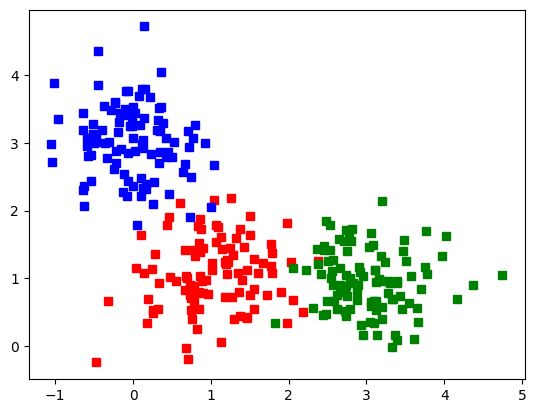

In [582]:
plt.plot(a[:,0],a[:,1], "sr")
plt.plot(b[:,0],b[:,1], "sb")
plt.plot(c[:,0],c[:,1], "sg")

In [583]:
data = torch.vstack((a,b,c))
data.shape

torch.Size([300, 2])

In [584]:
para_a = torch.zeros(numPerClass)
para_b = torch.ones(numPerClass)
para_c = torch.ones(numPerClass) * 2

labels = torch.hstack((para_a, para_b, para_c))
labels = labels.long()

In [585]:
ANN = nn.Sequential(
    nn.Linear(2,4),
    nn.ReLU(),
    nn.Linear(4,3),
)

lossfun = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(ANN.parameters(), lr=0.02)

epochs = 500
losses = torch.zeros(epochs)
allAcc = torch.zeros(epochs)


for epoch in range(epochs):
    # Forward pass
    y_pred = ANN(data)
    
    # Loss Compute
    loss = lossfun(y_pred, labels)
    losses[epoch] = loss
    
    # Backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    matches = torch.argmax(y_pred, axis=1) == labels
    matches = matches.float()
    acc = 100*torch.mean(matches)
    allAcc[epoch] = acc
    

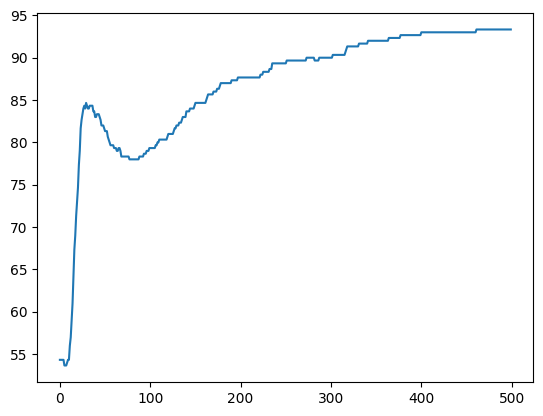

In [586]:
plt.plot(allAcc)

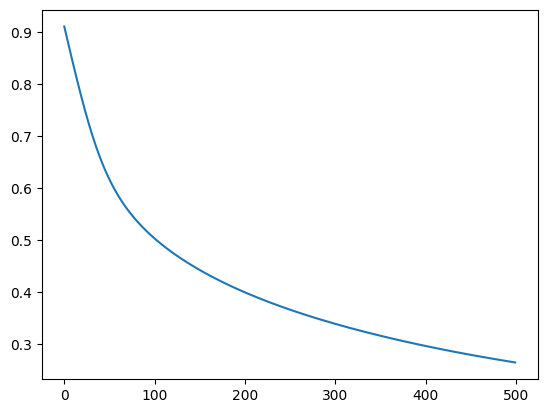

In [587]:
plt.plot(losses.detach())

In [588]:
acc

tensor(93.3333)

In [589]:
sm = nn.Softmax(dim=1)

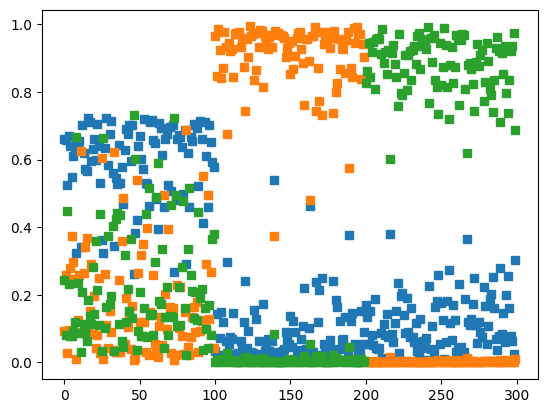

In [590]:
plt.plot(sm(y_pred).detach(), "s")

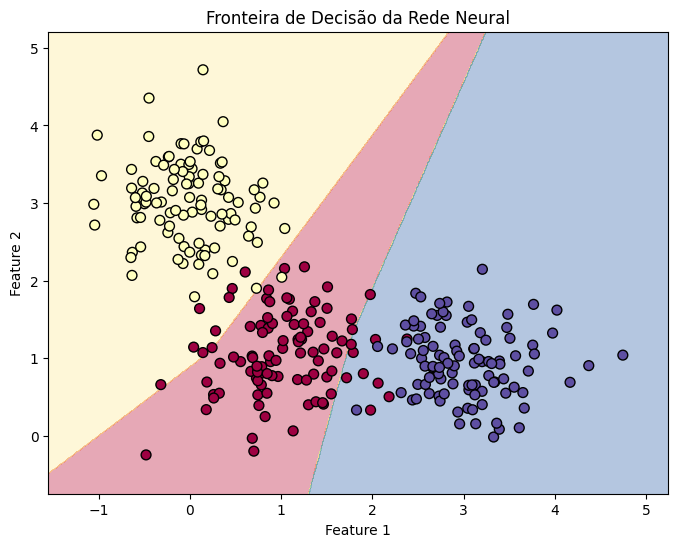

In [591]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(model, data, labels):
    # 0. Configurações iniciais
    model.eval() # Coloca em modo de avaliação (trava Dropout/Batchnorm se tiver)
    
    # Converta para numpy para facilitar a manipulação do grid
    X = data.detach().numpy()
    y = labels.detach().numpy()

    # 1. Define os limites do gráfico (min e max + uma margem de 0.5)
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # 2. Gera o Meshgrid (uma grade de pontos com espaçamento de 0.01)
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # 3. Prepara os pontos da grade para passar no PyTorch
    # Achata as matrizes (ravel) e empilha (c_) para ficar no formato [N, 2]
    grid_tensor = torch.tensor(np.c_[xx.ravel(), yy.ravel()]).float()

    # 4. Faz a previsão para toda a grade
    with torch.no_grad():
        preds = model(grid_tensor)
    
    # Pega a classe vencedora (0, 1 ou 2) para cada ponto da grade
    pred_classes = torch.argmax(preds, dim=1)
    
    # Volta para o formato da grade para o contourf entender
    Z = pred_classes.reshape(xx.shape)

    # 5. Plotagem
    plt.figure(figsize=(8, 6))
    
    # O Fundo (Fronteiras): cmap='Spectral' dá cores suaves
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='Spectral') 
    
    # Os Dados Reais (Pontos):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Spectral', edgecolors='k', s=50)
    
    plt.title("Fronteira de Decisão da Rede Neural")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# --- Como chamar a função ---
plot_decision_boundary(ANN, data, labels)

In [592]:
def creatModel(neurons):
    ANN = nn.Sequential(
        nn.Linear(2,neurons),
        nn.ReLU(),
        nn.Linear(neurons,3),
    )
    lossfun = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(ANN.parameters(), lr=0.02)
    return ANN, lossfun, optimizer


def trainModel(ANN):
    epochs = 500
    losses = torch.zeros(epochs)
    allAcc = torch.zeros(epochs)

    for epoch in range(epochs):
        # Forward pass
        y_pred = ANN(data)
    
        # Loss Compute
        loss = lossfun(y_pred, labels)
        losses[epoch] = loss
    
        # Backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
        matches = torch.argmax(y_pred, axis=1) == labels
        matches = matches.float()
        acc = 100*torch.mean(matches)
        allAcc[epoch] = acc
        
    return acc, allAcc, losses
    

In [593]:
accs = []
for i in range(1,129):
    ANN, lossfun, optimizer = creatModel(i)
    acc, allAcc, _ = trainModel(ANN)
    accs.append(acc.detach())
    

In [595]:
np.shape(accs)

(128,)

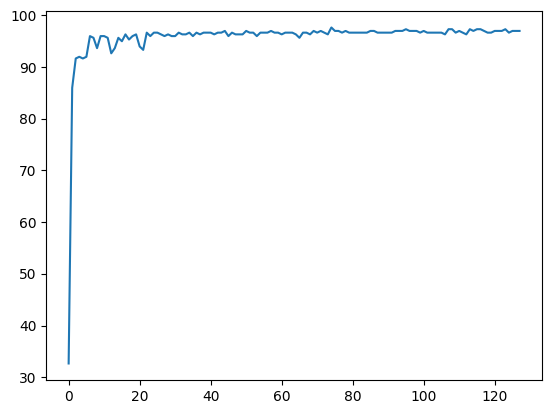

In [594]:
plt.plot(accs)